In [ ]:
!pip install sympy
!pip install numpy
!pip install matplotlib
!pip install scipy

In [11]:
from sympy import symbols, diff, simplify, init_printing
init_printing()

# Curve v1 equations
x, y, D, A = symbols("x y D A")
k = A*x*y/(D/2)**2
f = x*y + k*(x+y)*D - (D/2)**2 - k*D**2

df_dx = diff(f, x)
df_dy = diff(f, y)
dy_dx = -df_dx / df_dy

display(f)
print(dy_dx)

(4*A*y - 4*A*x*y/D - 4*A*y*(x + y)/D - y)/(-4*A*x + 4*A*x*y/D + 4*A*x*(x + y)/D + x)


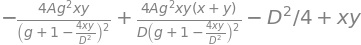

(4*A*g**2*y/(g + 1 - 4*x*y/D**2)**2 - 4*A*g**2*x*y/(D*(g + 1 - 4*x*y/D**2)**2) - 4*A*g**2*y*(x + y)/(D*(g + 1 - 4*x*y/D**2)**2) + 32*A*g**2*x*y**2/(D**2*(g + 1 - 4*x*y/D**2)**3) - 32*A*g**2*x*y**2*(x + y)/(D**3*(g + 1 - 4*x*y/D**2)**3) - y)/(-4*A*g**2*x/(g + 1 - 4*x*y/D**2)**2 + 4*A*g**2*x*y/(D*(g + 1 - 4*x*y/D**2)**2) + 4*A*g**2*x*(x + y)/(D*(g + 1 - 4*x*y/D**2)**2) - 32*A*g**2*x**2*y/(D**2*(g + 1 - 4*x*y/D**2)**3) + 32*A*g**2*x**2*y*(x + y)/(D**3*(g + 1 - 4*x*y/D**2)**3) + x)


In [74]:
# Curve v2 equations
x, y, D, A, g = symbols("x y D A g")
k0 = x*y/(D/2)**2
k = A*k0*g**2/(g+1-k0)**2
f = x*y + k*D*(x+y) - (D/2)**2 - k*D**2

df_dx = diff(f, x)
df_dy = diff(f, y)
dy_dx = -df_dx / df_dy

display(f)
print(dy_dx)

/tmp/ipykernel_30997/2742593220.py:38: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  ys_curve_v2 = [fsolve(f_curve_v2, D, args=(x, A, D, g))[0] for x in xs]
/tmp/ipykernel_30997/2742593220.py:38: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  ys_curve_v2 = [fsolve(f_curve_v2, D, args=(x, A, D, g))[0] for x in xs]


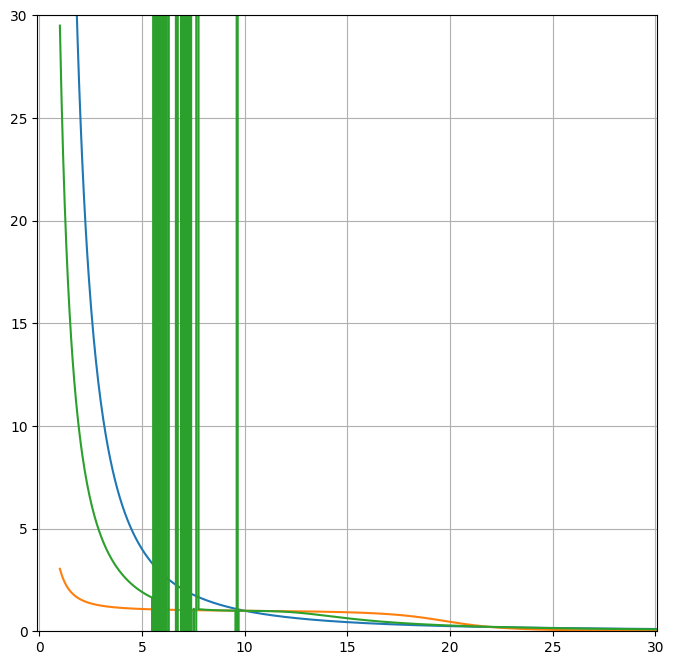

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

D = 20
A = 10
g = 0.1

def f_cp(y, x, D):
    return x*y - (D/2)**2

def dy_dx_cp(x, y):
    return -y/x

def f_curve_v1(y, x, A, D):
    k = A*x*y/(D/2)**2
    return x*y + k*D*(x+y) - (D/2)**2 - k*D**2
    
def dy_dx_curve_v1(x, y):
    return (4*A*y - 4*A*x*y/D - 4*A*y*(x + y)/D - y)/(-4*A*x + 4*A*x*y/D + 4*A*x*(x + y)/D + x)

def f_curve_v2(y, x, A, D, g):
    k0 = x*y/(D/2)**2
    k = A*k0*g**2/(g+1-k0)**2
    return x*y + k*D*(x+y) - (D/2)**2 - k*D**2
    
def dy_dx_curve_v2(x, y):
    return (4*A*g**2*y/(g + 1 - 4*x*y/D**2)**2 - 4*A*g**2*x*y/(D*(g + 1 - 4*x*y/D**2)**2) - 4*A*g**2*y*(x + y)/(D*(g + 1 - 4*x*y/D**2)**2) + 32*A*g**2*x*y**2/(D**2*(g + 1 - 4*x*y/D**2)**3) - 32*A*g**2*x*y**2*(x + y)/(D**3*(g + 1 - 4*x*y/D**2)**3) - y)/(-4*A*g**2*x/(g + 1 - 4*x*y/D**2)**2 + 4*A*g**2*x*y/(D*(g + 1 - 4*x*y/D**2)**2) + 4*A*g**2*x*(x + y)/(D*(g + 1 - 4*x*y/D**2)**2) - 32*A*g**2*x**2*y/(D**2*(g + 1 - 4*x*y/D**2)**3) + 32*A*g**2*x**2*y*(x + y)/(D**3*(g + 1 - 4*x*y/D**2)**3) + x)

xs = np.linspace(1, 40, 1000)

ys_cp = [fsolve(f_cp, D, args=(x, D))[0] for x in xs]
ps_cp = [-dy_dx_cp(x, y) for x, y in zip(xs, ys_cp)]

ys_curve_v1 = [fsolve(f_curve_v1, D, args=(x, A, D))[0] for x in xs]
ps_curve_v1 = [-dy_dx_curve_v1(x, y) for x, y in zip(xs, ys_curve_v1)]

ys_curve_v2 = [fsolve(f_curve_v2, D, args=(x, A, D, g))[0] for x in xs]
ps_curve_v2 = [-dy_dx_curve_v2(x, y) for x, y in zip(xs, ys_curve_v2)]

plt.figure(figsize=(8, 8)) 
plt.axis('equal')

plt.plot(xs, ps_cp)
plt.plot(xs, ps_curve_v1)
plt.plot(xs, ps_curve_v2)

plt.xlim(0, 30)
plt.ylim(0, 30)
plt.grid(True)
plt.show()

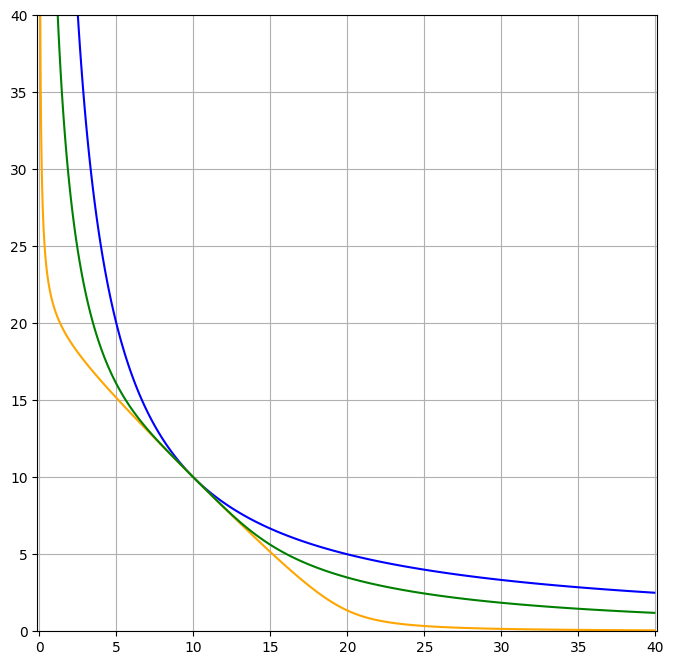

In [53]:
D = 20
A = 10
g = 0.1

xs = np.linspace(0, 40, 1000)
ys = np.linspace(0, 40, 1000)

x, y = np.meshgrid(xs, ys)

# Constant product
f_cp = x*y - (D/2)**2
# Curve v1
k = x*y/(D/2)**2
f_curve_v1 = x*y + A*k*(x+y)*D - (D/2)**2 - A*k*D**2
# Curve v2
k0 = x*y/(D/2)**2
k = A*k0*g**2/(g+1-k0)**2
f_curve_v2 = x*y + k*D*(x+y) - (D/2)**2 - k*D**2

plt.figure(figsize=(8, 8)) 
plt.axis('equal')

plt.contour(x, y, f_cp, levels=[0], colors='blue')
plt.contour(x, y, f_curve_v1, levels=[0], colors='orange')
plt.contour(x, y, f_curve_v2, levels=[0], colors='green')

plt.grid(True)
plt.show()